#DECISION TREE 
#PREDICT THOSE THAT SURVIVED AND THOSE THAT DID NOT SURVIVE IN TITANIC INCIDENT

In [57]:
import pandas as pd
df=pd.read_csv(r"C:\Users\nanaa\Downloads\titanic.csv")
df.head()#original dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
#delete some columns and maket our target variable we want to predict Survived
inputs = df.drop(['Survived', 'Pclass','PassengerId','Name','Parch','SibSp','Cabin','Ticket'], axis='columns')
target = df['Survived']


In [59]:
inputs

,Sex,Age,Fare,Embarked
0,male,22.0,7.2500,S
1,female,38.0,71.2833,C
2,female,26.0,7.9250,S
3,female,35.0,53.1000,S
4,male,35.0,8.0500,S
...,...,...,...,...
886,male,27.0,13.0000,S
887,female,19.0,30.0000,S
888,female,NaN,23.4500,S
889,male,26.0,30.0000,C


In [60]:
#Now our predictor variables are categorical so we will use LabelEncoder to label the variables numerically
from sklearn.preprocessing import LabelEncoder

In [61]:
#Now create the object of the class and my columns are 2.So i will create 2 different objects
le_Sex=LabelEncoder()
le_Embarked=LabelEncoder()


In [62]:
#Next i will create a new column in my Input dataframe
Sex_n = 'Sex_n'
Embarked_n='Embarked_n'

inputs[Sex_n]=le_Sex.fit_transform(inputs['Sex'])
inputs[Embarked_n]=le_Sex.fit_transform(inputs['Embarked'])
inputs.head()

,Sex,Age,Fare,Embarked,Sex_n,Embarked_n
0,male,22.0,7.2500,S,1,2
1,female,38.0,71.2833,C,0,0
2,female,26.0,7.9250,S,0,2
3,female,35.0,53.1000,S,0,2
4,male,35.0,8.0500,S,1,2


In [63]:
inputs_n = inputs.drop(['Sex', 'Embarked'], axis='columns')
inputs_n

,Age,Fare,Sex_n,Embarked_n
0,22.0,7.2500,1,2
1,38.0,71.2833,0,0
2,26.0,7.9250,0,2
3,35.0,53.1000,0,2
4,35.0,8.0500,1,2
...,...,...,...,...
886,27.0,13.0000,1,2
887,19.0,30.0000,0,2
888,NaN,23.4500,0,2
889,26.0,30.0000,1,0


In [64]:
from sklearn import tree

In [65]:
model=tree.DecisionTreeClassifier()


In [66]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [67]:
#Train my model but first i need to predict the models score which is not so bad
model.score(inputs_n,target)


0.7991021324354658

In [39]:
#The model predicted that a 22 year old that paid a fare of 7.2500 and happened to be a male whoembarked on an S did not survive
model.predict([[22,7.2500,1,2]])

C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [40]:
#The model predicts that the next person survided(Age(38,Fare(71.2833,Sex(Female,Emabrked(C)))))
model.predict([[38,71.2833,0,0]])

C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [69]:
X = df.drop('Survived', axis='columns')
y = df['Survived']

In [70]:
#i noticed that eventhough i had not trained my model earlier the prediction was still spot
#now i am going to train my model and predict again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
model.score(inputs_n,target)

0.7991021324354658

In [72]:
model.predict([[22,7.2500,1,2]])

C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [73]:
model.predict([[38,71.2833,0,0]])

C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [74]:
model.predict([[32,7.7500,1,1]])

C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [76]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       105
           1       0.74      0.68      0.70        74

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179



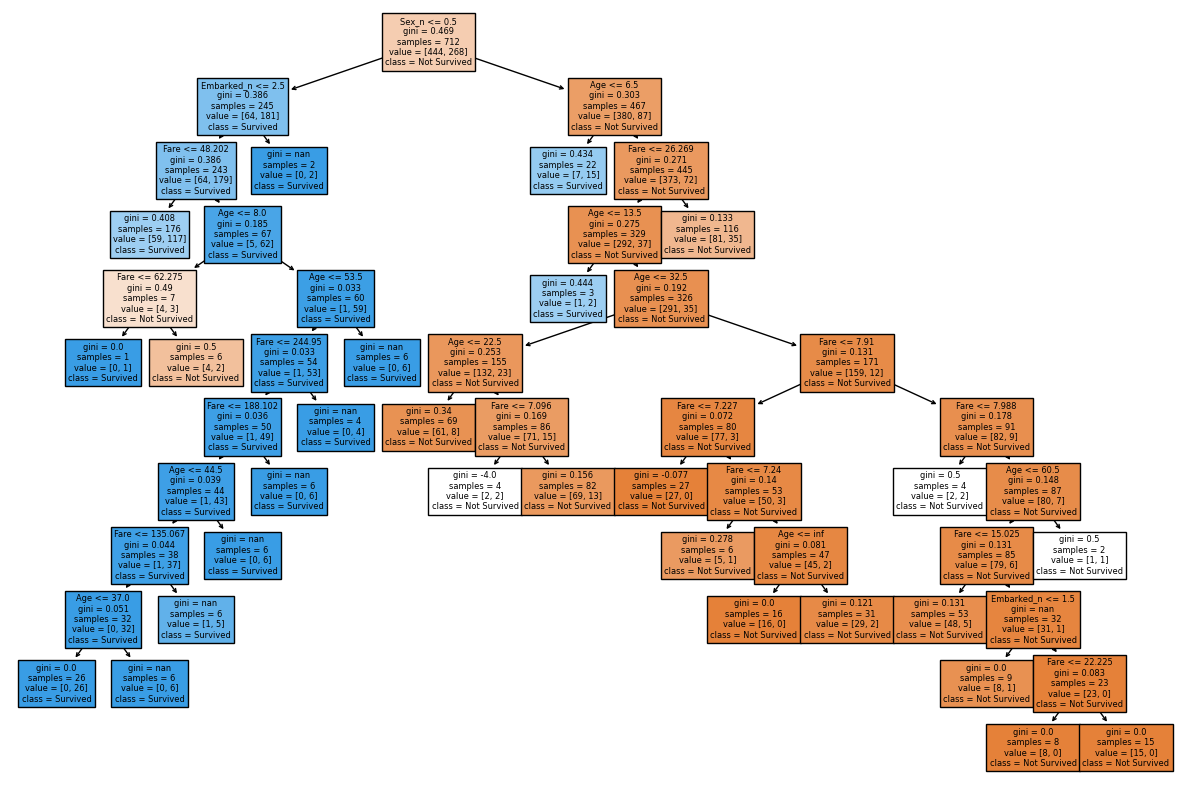

In [79]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv(r"C:\Users\nanaa\Downloads\titanic.csv")

# Preprocess the data
inputs = df.drop(['Survived', 'Pclass','PassengerId','Name','Parch','SibSp','Cabin','Ticket'], axis='columns')
target = df['Survived']

le_Sex = LabelEncoder()
le_Embarked = LabelEncoder()

inputs['Sex_n'] = le_Sex.fit_transform(inputs['Sex'])
inputs['Embarked_n'] = le_Embarked.fit_transform(inputs['Embarked'])

inputs_n = inputs.drop(['Sex', 'Embarked'], axis='columns')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot the decision tree
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=inputs_n.columns.tolist(), class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



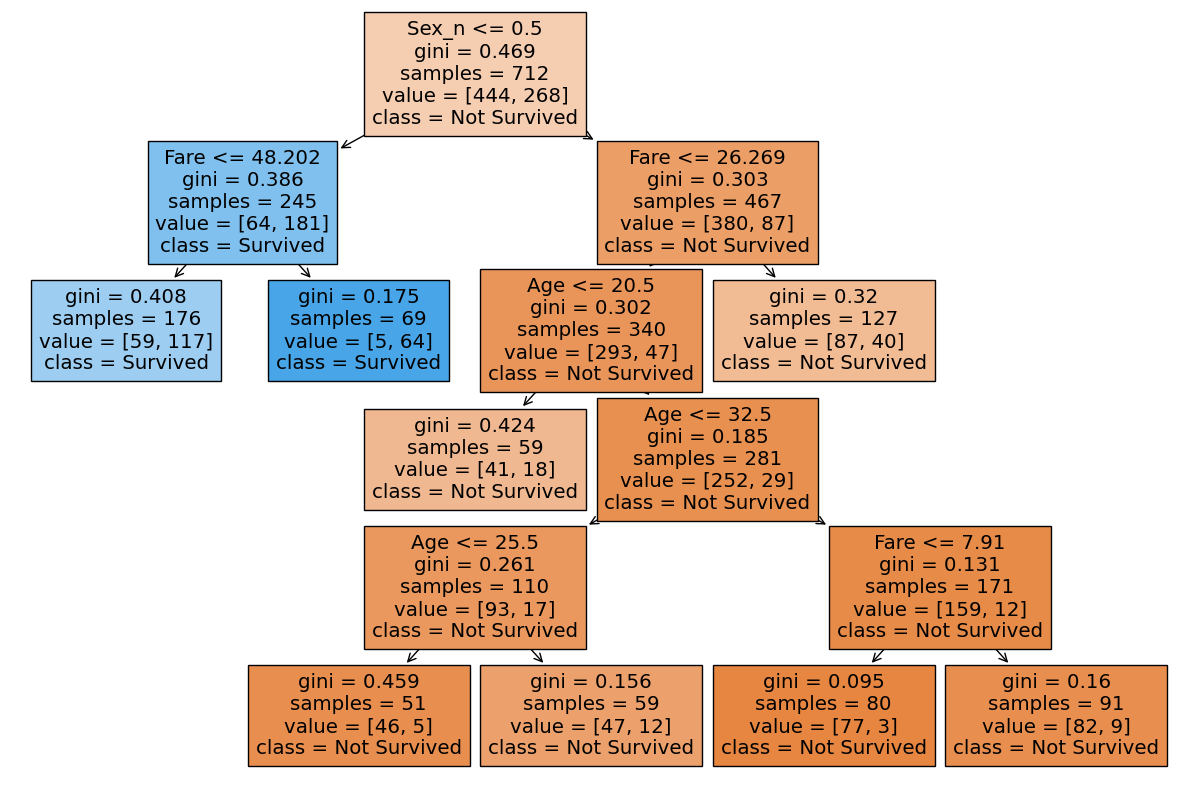

In [80]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv(r"C:\Users\nanaa\Downloads\titanic.csv")

# Preprocess the data
inputs = df.drop(['Survived', 'Pclass','PassengerId','Name','Parch','SibSp','Cabin','Ticket'], axis='columns')
target = df['Survived']

le_Sex = LabelEncoder()
le_Embarked = LabelEncoder()

inputs['Sex_n'] = le_Sex.fit_transform(inputs['Sex'])
inputs['Embarked_n'] = le_Embarked.fit_transform(inputs['Embarked'])

inputs_n = inputs.drop(['Sex', 'Embarked'], axis='columns')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2, random_state=42)

# Instantiate decision tree classifier with specified parameters
clf = DecisionTreeClassifier(min_samples_leaf=50, max_depth=7)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=inputs_n.columns.tolist(), class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
